In [3]:
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import scipy as ss
import scipy.stats
import seaborn as sns
%matplotlib inline
import itertools
import seaborn as sns
from sklearn.decomposition import PCA

import visualization_functions as vis

# col1 = "#f93c3c"
# col2 = "#009a7f"
# col3 = "#9fa8ab"
# col5 = "#00490c"
# col4 = "#f4d895"

col1 = "#f34236"
col2 = "#d6c571"
col3 = "#88bc67"
col4 = "#2e8174"
col5 = "#143969"

colors = [col1, col2, col3, col4, col5]


counts_file = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
            "data/counts/stranded/2018-04-23_counts.csv"
    
rpkm_file = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
            "data/counts/stranded/2018-04-23_rpkm.csv"
    
study_design_file = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
                    "data/ref/study_design.csv"

figures_folder = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/figures/"


rpkms = pd.read_csv(rpkm_file, index_col=0)
rpkms.columns = [c.split("_")[0] for c in rpkms.columns]

meta = pd.read_csv(study_design_file, index_col=0)
meta.index = [i.split("S")[1] for i in meta.index]


rpkms = pd.read_csv(rpkm_file, index_col=0)
rpkms.columns = [c.split("_")[0] for c in rpkms.columns]

meta = pd.read_csv(study_design_file, index_col=0)
meta.index = [i.split("S")[1] for i in meta.index]

wt = "WT"
mut = "9C1"

mut_L = "Dienes Line"
wt_L = "Merge"

bh_mut = "Behind Dienes Line"
bh_wt = "Behind Merge"

thirty = "30 min"
zero = "0 min"

samples = {"Case5":"{} | {}".format(wt_L, thirty),
           "Case6":"{} | {}".format(wt_L, zero),
            "Case7":"{} | {} | {}".format(wt, bh_mut, thirty), 
          "Case8":"{} | {} | {}".format(mut, bh_mut, thirty),
          "Case9": "{} | {}".format(mut_L, zero),
          "Case10": "{} | {}".format(mut_L, thirty),
          "Case11": "{} | {} | {}".format(mut, bh_mut, zero),
           "Case12":"{} | {} | {}".format(wt, bh_mut, zero),
          "Case13": "{} | {} | {}".format(wt, bh_wt,zero ),
           "Case14":"{} | {} | {}".format(wt, bh_wt, thirty)}


In [4]:
meta = meta[meta["lane.ID"]!="L1"]
rpkms = rpkms[meta.index]
rpkms_norm =  rpkms.apply(vis.invnorm)
meta["samples"] = [samples[i] for i in meta["group.ID"]]
meta["time.point"] = meta["time.point"].str.replace("0''", "0 min")
meta["time.point"] = meta["time.point"].str.replace("4'", "4 hrs")
meta['position'] = meta['position'].map({'B': "{}|{}".format(wt, bh_wt),
                                        "BH": "{}|{}".format(wt, bh_mut),
                                        "B9":"{}|{}".format(mut, bh_mut),
                                        "L-HI":wt_L,
                                        "L-9C": mut_L})

In [34]:
meta

,lane.ID,group.ID,time.point,strain.ID,position,RIN,samples
76067,L2,Case5,30 min,HI,Merge,6.8,Merge | 30 min
76068,L2,Case5,30 min,HI,Merge,6.1,Merge | 30 min
76069,L2,Case5,30 min,HI,Merge,6.1,Merge | 30 min
76070,L2,Case6,0 min,HI,Merge,6.4,Merge | 0 min
76071,L2,Case6,0 min,HI,Merge,4.5,Merge | 0 min
76072,L2,Case6,0 min,HI,Merge,6.1,Merge | 0 min
76073,L2,Case7,30 min,Mix,WT|Behind Dienes Line,6.2,WT | Behind Dienes Line | 30 min
76074,L2,Case7,30 min,Mix,WT|Behind Dienes Line,6.3,WT | Behind Dienes Line | 30 min
76075,L2,Case7,30 min,Mix,WT|Behind Dienes Line,6.9,WT | Behind Dienes Line | 30 min
76076,L2,Case8,30 min,Mix,9C1|Behind Dienes Line,5.5,9C1 | Behind Dienes Line | 30 min


In [5]:
line_meta = meta[meta["group.ID"].isin(["Case6", "Case5","Case9", "Case10"])]
line_meta
line_rpkms = rpkms_norm[line_meta.index]
pDf, pc1_var, pc2_var = vis.findTwoComponents(line_rpkms, line_meta)

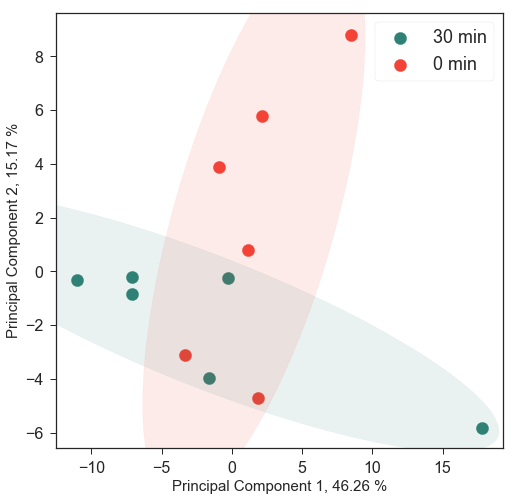

In [36]:
fn = os.path.join(figures_folder, '2018-07-02-proteus-figure_3a.png')
fig = vis.plotPCA(pDf, pc1_var, pc2_var, "time.point", c= [col4, col1], nameby="", title = "", 
              filename = fn, el=True)

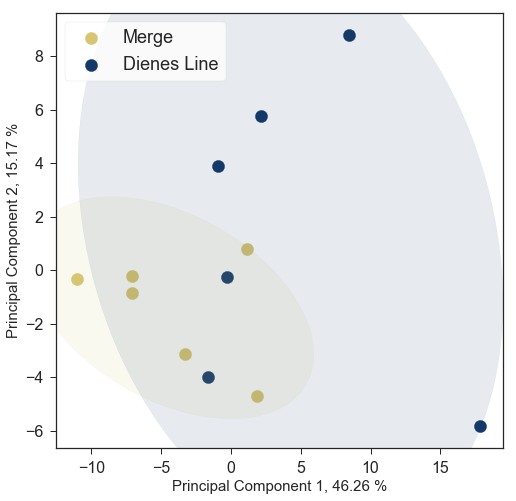

In [37]:
fn = os.path.join(figures_folder, '2018-07-02-proteus-figure_3b.png')
fig = vis.plotPCA(pDf, pc1_var, pc2_var, "position", c= [col2, col5], nameby="", title = "", 
              filename = fn, el=True)

In [9]:
# de_file = "/Users/annasintsova/git_repos/proteus/analysis/DESeq/data/2018-04-24-Dienes-line-time.csv"
# de_file_swarm = "/Users/annasintsova/git_repos/proteus/analysis/DESeq/data/2018-04-24-Swarm-line-time.csv"
# log2change_sw = pd.read_csv(de_file_swarm, index_col=0)
# log2change_dl = pd.read_csv(de_file, index_col=0)
# #log2change_dl.rename(columns ={"log2FoldChange":"log2FC_DL"}, inplace=True)
# log2change_dl

# #log2change_sw.rename(columns ={"log2FoldChange":"log2FC_SW"}, inplace=True)
# L2FC_new = pd.DataFrame({ wt_L:log2change_sw["log2FoldChange"], mut_L:log2change_dl["log2FoldChange"]}).dropna()
# L2FC_new


,Dienes Line,Swarm Front
PMI0229,1.143135,-1.223666
PMI1425,2.219405,-1.966218
PMI1426,2.536457,-1.631109
PMI1427,1.598964,-1.050086
PMI1428,1.559769,-1.156050
PMI1429,1.358556,-1.262715
PMI1430,1.166837,-1.262843
PMI1548,1.045110,-1.380181


In [6]:
de_file = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
          "tables/2018-06-28-dienes-line-0-30_edited.csv"
de_file_sw = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
             "tables/2018-06-28-wt-swarm-front-0-30_edited.csv"
log2change_sw = pd.read_csv(de_file_sw, index_col=0)
log2change_dl = pd.read_csv(de_file, index_col=0)

L2FC_new = pd.DataFrame({ wt_L:log2change_sw["Log2 Fold Change"], mut_L:log2change_dl["Log2 Fold Change"],
                          "gene_name":log2change_dl["Gene Name"]}).dropna()
L2FC_new
name_it = [ "$\it{}$".format(g) for g in L2FC_new.gene_name]
full_name =["{} ({})".format(i, n) for i, n in zip(L2FC_new.index, name_it)]
L2FC_new["full_name"] = full_name
L2FC_new_it = L2FC_new[[mut_L, wt_L]]
L2FC_new_it.set_index(L2FC_new.full_name, inplace=True)
L2FC_new_it.index.name=""
L2FC_new_it

,Dienes Line,Merge
,,
PMI1425 ($\ithmuR1$),2.219405,-1.966218
PMI1426 ($\ithmuR2$),2.536457,-1.631109
PMI1427 ($\ithmuS$),1.598964,-1.050086
PMI1428 ($\ithmuT$),1.559769,-1.156050
PMI1429 ($\ithmuU$),1.358556,-1.262715
PMI1430 ($\ithmuV$),1.166837,-1.262843


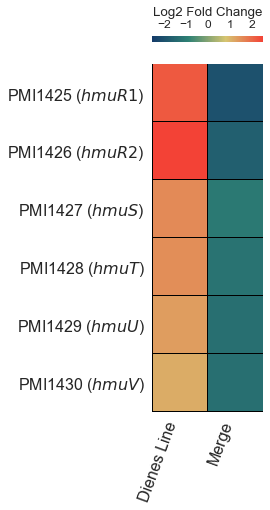

In [7]:
my_cmap = my_cmap = LinearSegmentedColormap.from_list('custom blue', [col5, col4, col2,col1], N=256)
fig = plt.figure(figsize=(2,8))
sns.set(font_scale=1.2)
ax = sns.heatmap(L2FC_new_it, cmap = my_cmap, 
                 linewidths=0.5, linecolor='black',
                 cbar_kws = {'use_gridspec':False,'location':"top",
                            'label': 'Log2 Fold Change', });
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 16, rotation = 70, ha= "right");
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16, rotation = 360);

#fig.savefig(os.path.join(figures_folder, "2018-07-02-proteus_rnaseq_figure_3c.png"), dpi=300, bbox_inches="tight")

In [40]:
mk_file = "/Users/annasintsova/git_repos/proteus/analysis/mutant_killing/rpkm/kan_rpkms.csv"
mk = pd.read_csv(mk_file, index_col=0, names=["Kan RPKM"])
mk.index = [i.strip("S") for i in mk.index]
mk = mk.join(line_meta, how = "inner")
#mk["samples"] = [samples[i] for i in mk["group.ID"]]
mk

,Kan RPKM,lane.ID,group.ID,time.point,strain.ID,position,RIN,samples
76067,0.53,L2,Case5,30 min,HI,Merge,6.8,Merge | 30 min
76068,0.74,L2,Case5,30 min,HI,Merge,6.1,Merge | 30 min
76069,1.57,L2,Case5,30 min,HI,Merge,6.1,Merge | 30 min
76070,1.47,L2,Case6,0 min,HI,Merge,6.4,Merge | 0 min
76071,4.25,L2,Case6,0 min,HI,Merge,4.5,Merge | 0 min
76072,1.62,L2,Case6,0 min,HI,Merge,6.1,Merge | 0 min
76079,111.53,L2,Case9,0 min,Mix,Dienes Line,7.4,Dienes Line | 0 min
76080,129.75,L2,Case9,0 min,Mix,Dienes Line,7.3,Dienes Line | 0 min
76081,78.52,L2,Case9,0 min,Mix,Dienes Line,6.8,Dienes Line | 0 min
76082,258.08,L2,Case10,30 min,Mix,Dienes Line,6.2,Dienes Line | 30 min


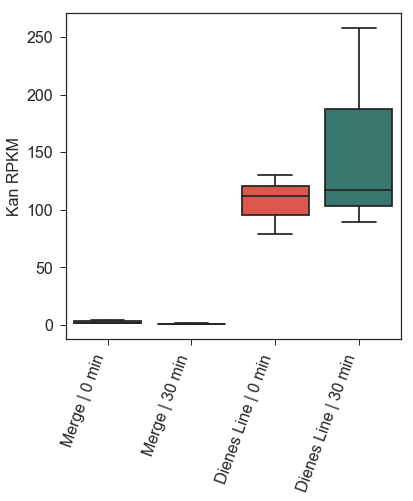

In [43]:
fig = plt.figure(figsize = (6,6))
sns.set_style("ticks")
order = [samples["Case6"], samples["Case5"], samples["Case9"], samples["Case10"]]
ax = sns.boxplot(x= "samples", y="Kan RPKM", data = mk, palette=[col2, col5, col1, col4], order=order);
plt.yticks(fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize = 16,ha="right")
ax.set_xlabel("")
ax.set_ylabel(ax.get_ylabel(), fontsize=16)
fig.savefig(os.path.join(figures_folder, "2018-07-02-proteus_rnaseq_figure_3d.png"), dpi=300, bbox_inches="tight")

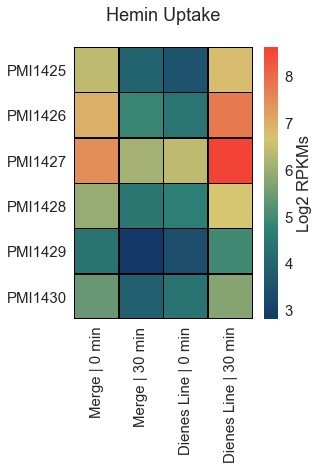

In [9]:
hemin = ["PMI1425", "PMI1426", "PMI1427", "PMI1428", "PMI1429", "PMI1430"]
sns.set(font_scale=1.5)

fig = vis.draw_heatmap_of_subset(hemin, meta, "Hemin Uptake\n",
                          rpkms, samples, my_cmap, (4,5), ["Case6", "Case5", "Case9", "Case10"])
fig.savefig(os.path.join(figures_folder, "2018-07-03-proteus_rnaseq_supplemental_figure_1a.png"), dpi=300, bbox_inches="tight")

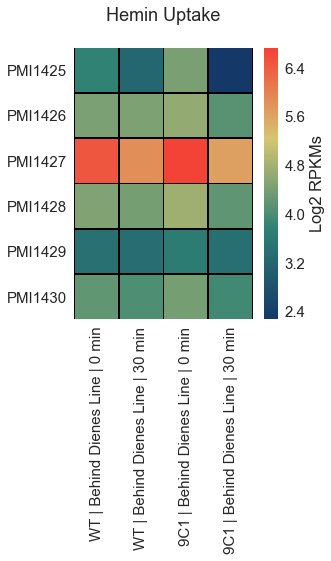

In [10]:
fig = vis.draw_heatmap_of_subset(hemin, meta, "Hemin Uptake\n",
                          rpkms, samples, my_cmap, (4,5))
fig.savefig(os.path.join(figures_folder, "2018-07-03-proteus_rnaseq_supplemental_figure_1b.png"), dpi=300, bbox_inches="tight")

In [14]:
def get_rid_of_genbank(df, column_name = "Function", genbank = "GenBank"):
    fx = df[column_name]
    fx = fx.str.replace("\({}\)".format(genbank), "")
    df[column_name] = fx
    return df

In [20]:

de_DL = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/tables/"\
        "2018-06-28-dienes-line-0-30_edited.csv"
de_ME = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/tables/"\
        "2018-06-28-wt-swarm-front-0-30_edited.csv"
    
data_folder = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/tables/"
de_mut= pd.read_csv(de_DL, index_col=0)
de_wt= pd.read_csv(de_ME, index_col=0)
de_mut = get_rid_of_genbank(de_mut)
de_wt = get_rid_of_genbank(de_wt)


de_mut = de_mut.drop(["Mean Expression"], axis=1).sort_index()
de_mut.to_excel(os.path.join(data_folder, "Supplementary_Table_4_DIENES_LINE_30_MIN.xlsx"))

de_wt = de_wt.drop(["Mean Expression"], axis=1).sort_index()
de_wt.to_excel(os.path.join(data_folder, "Supplementary_Table_3_MERGE_30_min.xlsx"))

In [21]:
de_wt.shape

(121, 5)

In [22]:
de_mut.shape

(24, 5)